# Electric Vehicle DataAnalysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_Original = pd.read_csv(r"C:\Users\user\Downloads\New folder\Electric Vehicle Dataset.csv")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df = df_Original.copy()

In [3]:
df.head()

,Unnamed:,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,0,30,Nabha,None,Single,Graduate,5,1193875.647,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,1,27,Pune,None,Single,Graduate,4,1844540.398,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,2,32,Kashipur,None,Single,Graduate,4,2948150.113,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,3,55,Pune,Business,Single,Graduate,3,2832379.739,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,4,26,Satara,None,Single,Graduate,4,2638750.576,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"


In [4]:
df.tail()

,Unnamed:,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
995,995,31,Pune,None,Married,Graduate,7,2110722.120,Yes,SUV,Yes,KIA,<25 lakhs,4,"Yes, in <10 years"
996,996,29,Pune,None,Married,Post Graduate,4,1616287.706,No,SUV,Yes,KIA,<5 lakhs,4,"Yes, in <20years"
997,997,30,Mumbai,Business,Single,Graduate,4,2202829.029,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
998,998,24,Ahmedabad,None,Married,Graduate,4,1764744.068,Yes,SUV,Yes,Maruti,<15 lakhs,4,"Yes, in <20years"
999,999,30,Pune,Business,Single,Graduate,4,2486664.468,No,Liftback,Yes,Maruti,<5 lakhs,4,"Yes, in <10 years"


#### Data Processing

In [5]:
df.isnull().sum()

Unnamed:                                                                0
Age                                                                     0
City                                                                    0
Profession                                                              0
Marital Status                                                          0
Education                                                               0
No. of Family members                                                   0
Annual Income                                                           0
Would you prefer replacing all your vehicles to Electronic vehicles?    0
If Yes/Maybe what type of EV would you prefer?                          0
Do you think Electronic Vehicles are economical?                        0
Which brand of vehicle do you currently own?                            0
How much money could you spend on an Electronic vehicle?                0
Preference for wheels in EV           

In [112]:
df.columns

Index(['Unnamed: ', 'Age', 'City', 'Profession', 'Marital Status', 'Education',
       'No. of Family members', 'Annual Income',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?'],
      dtype='object')

In [6]:
df.shape

(1000, 15)

In [114]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [115]:
df.corr()

,Unnamed:,Age,No. of Family members,Annual Income,Preference for wheels in EV
Unnamed:,1.000,-0.004,0.009,-0.011,-0.023
Age,-0.004,1.000,0.024,-0.012,0.028
No. of Family members,0.009,0.024,1.000,0.028,-0.021
Annual Income,-0.011,-0.012,0.028,1.000,-0.023
Preference for wheels in EV,-0.023,0.028,-0.021,-0.023,1.000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Unnamed:                                                              1000 non-null   int64  
 1   Age                                                                   1000 non-null   int64  
 2   City                                                                  1000 non-null   object 
 3   Profession                                                            1000 non-null   object 
 4   Marital Status                                                        1000 non-null   object 
 5   Education                                                             1000 non-null   object 
 6   No. of Family members                                                 1000 non-null   int64  
 7 

In [117]:
df['Age'].unique()

array([ 30,  27,  32,  55,  26,  28,  23,  25,  43,  59,  21,  29,  56,
        70,  50,  24,  61,  39,  31,  40,  18,  58,  22,  96,  64,  52,
        54,  42,  49,  57,  46,  36,  20,  19,  65,  17,  60,  44,  45,
        47,  82,  33,  37,  48,  69,  67,  86,  62,  66,  34,  63,  41,
        68,  16,  53,  15, 118,  38], dtype=int64)

In [118]:
df['City'].unique()

array(['Nabha', 'Pune', 'Kashipur', 'Satara', 'Noida', 'Delhi', 'Mumbai',
       'pune', 'solapur', 'Haldwani', 'Nellore', 'Banglore', 'Faridabad',
       'Nagpur', 'Chandrapur', 'Chennai', 'Gurugram', 'Nashik',
       'Bengaluru', 'Hakdwani', 'Patiyala', 'pUNE', 'Ahmedabad', 'Karnal',
       'Rewari', 'New Delhi', 'Serampore', 'Jhansi', 'Jalandhar',
       'nashik'], dtype=object)

In [85]:
df["City"] = df["City"].replace({"Pune":"Pune", "pUNE": "Pune", "pune": "Pune", "Pune ": "Pune"})
df["City"] = df["City"].replace({"Mumbai ":"Mumbai", "Mumbai": "Mumbai"})
df["City"] = df["City"].replace({"Banglore ":"Bengaluru"})
df["City"] = df["City"].replace({"Delhi":"New Delhi", "Delhi ": "New Delhi", "New Delhi ": "New Delhi"})
df["City"] = df["City"].replace({"Hakdwani":"Haldwani", "Haldwani ": "Haldwani"})
df["City"] = df["City"].replace({"nashik":"Nashik"})


In [86]:
df['No. of Family members'].unique()

array([5, 4, 3, 2, 8, 6, 0, 1, 7], dtype=int64)

In [87]:
df['How much money could you spend on an Electronic vehicle?'].unique()

array(['<5 lakhs', '<15 lakhs', '<25 lakhs', '700000', '>25 lakhs',
       '2000000', '1200000', '1500000'], dtype=object)

In [119]:
df.drop('Unnamed: ', axis=1, inplace = True)


In [124]:
df.describe()

,Age,No. of Family members,Annual Income,Preference for wheels in EV
count,1000.000,1000.000,1000.000,1000.000
mean,31.800,4.118,2258341.824,3.349
std,11.295,1.470,999355.758,0.888
min,15.000,0.000,-376150.863,2.000
25%,26.000,4.000,1782115.520,2.000
50%,29.000,4.000,2329246.376,4.000
75%,31.000,5.000,2753169.612,4.000
max,118.000,8.000,12821282.030,4.000


#### Data Visualization

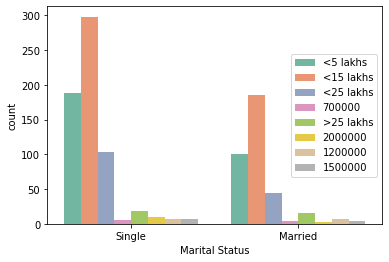

In [10]:
sns.countplot(x ='Marital Status', hue = 'How much money could you spend on an Electronic vehicle?',  data = df, palette = 'Set')
plt.legend(loc='center right')
plt.show()

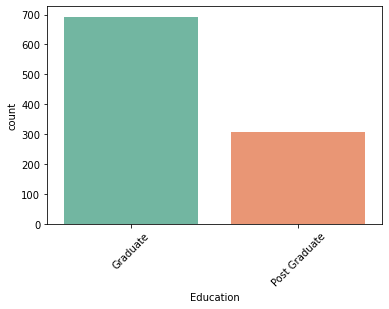

In [12]:
sns.countplot(x='Education', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.show()


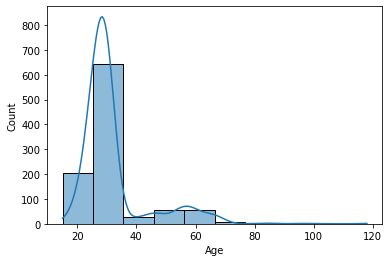

In [13]:
sns.histplot(x='Age', data=df, bins=10, kde=True)
plt.show()


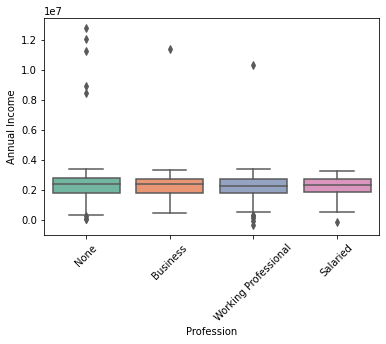

In [14]:
sns.boxplot(x='Profession', y='Annual Income', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.show()


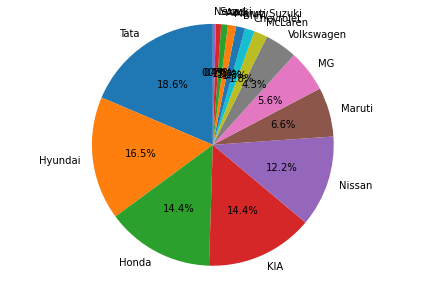

In [18]:
vehicle_counts = df['Which brand of vehicle do you currently own?'].value_counts()
plt.pie(vehicle_counts, labels=vehicle_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.tight_layout()
plt.show()


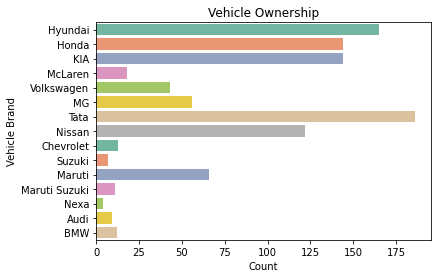

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

vehicle_counts = df['Which brand of vehicle do you currently own?'].value_counts()
sns.countplot(y='Which brand of vehicle do you currently own?', data=df, palette='Set2')
plt.xlabel('Count')
plt.ylabel('Vehicle Brand')
plt.title('Vehicle Ownership')
plt.show()
